In [325]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. How to fit a multiple linear regression model

In a multiple linear regression model, there are more than one indepdent variable which means that we can predict the response more accurately because we take into account multiple predictors. 

The process of fitting a multiple linear regression model is similar to that of a simple one. The objective is to minimize the differences between the predicted value $\hat{y}$ and the real $y$ using the metric **Residual Sum of Squares**.

### 1.1. General format

In the case of multiple linear regression, because there are multiple predictors (Example: $x_1, x_2, ...$), we will present the parameters in matrix form $X \hat{B} = \hat{y}$.

$X = \begin{bmatrix} 
1 & x_1 & x_2 & \cdots  & x_n\\ 
\vdots  & \vdots  &  \vdots & \vdots & \vdots \\ 
1 & x_1 & x_2 & \cdots  & x_n
\end{bmatrix}     \;   $;    $\;      \hat{B} = \begin{bmatrix}
b_0 & b_1 & b_2 & \cdots  & b_n\\ 
\vdots  & \vdots  &  \vdots & \vdots & \vdots \\ 
b_0 & b_1 & b_2 & \cdots  & b_n
\end{bmatrix}   \; $   ;   $  \;      \hat{y} = \begin{bmatrix}
y_1\\ 
y_2\\ 
\vdots\\ 
y_n
\end{bmatrix}$



### 1.2. Find model coefficients $\hat{B}$

Similar to the simple linear regression model, we need to find the value of $\hat{b_o}, \hat{b_1}, ..., \hat{b_n}$ which, in this case, are included in column vector $\hat{B}$. 

$RSS = \sum_{i=1}^{n}(y_i - \hat{y_i})^2 = (y - \hat{y})^T(y - \hat{y}) $

$RSS = (y - X\hat{B})^T(y - X\hat{B}) = y^Ty - Y^TX\hat{B} -\hat{B}^TX^Ty + \hat{B}^TX^TX\hat{B}$

Now we find the derivative of $RSS$ with respect to $\hat{B}$ $(\frac{\partial RSS}{\partial \hat{B}})$ and set the value of each partial derivative to $0$ because our objective is to find the minumum value of $\hat{B}$.

After some matrix manipulation, the value of $\hat{B}$ is:

$\hat{B} = (X^TX)^{-1}X^Ty$

### 1.3. Demonstrate multiple linear model fitting

**Step 1: Simulate the data**

In this example, we will take IQ and number of study hours, which are organized in the second and third column respectively, as two independent variables. Test score is the dependent variable summarized in vector $y$. 

In [326]:
X = np.array([
    [1, 110, 40],
    [1, 120, 30],
    [1, 100, 20],
    [1, 90, 0],
    [1, 80, 10]
])

In [327]:
Y = np.array([
    [100],
    [90],
    [80],
    [70],
    [60]
])

In [328]:
B = np.array([])

**Step 2: Apply the formular to find $\hat{B}$**

We use function **dot** in Numpy for matrix multiplication and **inv** from Numpy/Linear Algebra to find the inverse of a matrix.

Following the formula $\hat{B} = (X^TX)^{-1}X^Ty$, we have:

$b_0 = 20 \; ; \; b_1 = 0.5 \; ; \; b_2 = 0.5$

In [329]:
B = np.dot(np.dot(inv(np.dot(X.T, X)), X.T), Y)
B

array([[20. ],
       [ 0.5],
       [ 0.5]])

**Step 3: Visualize the model**

We will be using function **plot_surface** from matplotlib/Axes 3D. 

The inputs of this function are three (03) matrices representing the three dimensions of the model. 

In [330]:
def model(X):
    return np.dot(X, B)

In [331]:
X1 = np.linspace(X[:,1].min(), X[:,1].max(), 100)
X2 = np.linspace(X[:,2].min(), X[:,2].max(), 100)

In [332]:
X1_plot, X2_plot = np.meshgrid(X1, X2)

X_model = np.concatenate([np.ones(10000).reshape(-1, 1), X1_plot.reshape(-1, 1), X2_plot.reshape(-1, 1)], axis=1)

Y_plot = model(X_model).reshape(-1,100)

In [333]:
Y_plot.shape

(100, 100)

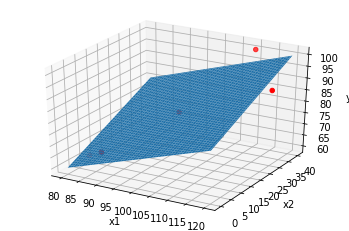

In [334]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], Y, c='red')
ax.plot_surface(X1_plot, X2_plot, Y_plot)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
                             
plt.show()

## 2. Evaluate multiple linear regression model

### 2.1. Is there a relationship between the response and preidictors?
In multiple linear regression setting with $p$ predictors, we test the following hypotheses:

$H_0: \beta_1 = \beta_2 = ... = \beta_1p = 0$

$H_a:$ At least one $\beta_j$ is non-zero

**F-statistic**

The hypothesis test is performed by computing the _F-statistic_:

$F = \frac{(TSS - RSS)\times RSS}{p \times (n - p - 1)}$     where: 

$p$: Number of predictors  and $n$: Sample size

$TSS = \sum(y_i - \bar{y})^2$ and $RSS = \sum(y_i - \hat{y_i})^2$ 

In [340]:
y_bar = np.average(Y)
tss = np.square(Y - y_bar).sum()
tss

1000.0

In [342]:
y_hat = model(X)
rss = np.square(Y - y_hat).sum()
rss

100.0

In [345]:
p = 2
n = len(X)

f_num = (tss - rss)*rss
f_den = p*(n - p -1)

F = f_num/f_den

F

22500.0